In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [41]:
import pandas as pd

def clean_and_fill_missing_dates(input_path: str) -> pd.DataFrame:
    """
    Cleans the dataset by filling missing dates with the last available data.

    Parameters:
    input_path (str): Path of input CSV file.

    Returns:
    pd.DataFrame: The cleaned dataset.
    """
    # Load the data and skip the first two rows 
    data = pd.read_csv(input_path, skiprows=2)

    # Ensure the "Date" column is properly parsed as datetime
    data['Date'] = pd.to_datetime(data['Date'])

    # Sort the data by date to ensure chronological order
    data.sort_values('Date', inplace=True)

    # Create a complete date range from the earliest to the latest date
    full_date_range = pd.date_range(start=data['Date'].min(), end=data['Date'].max())

    # Reindex the DataFrame to include all dates and fill missing rows with the last available data
    data = data.set_index('Date').reindex(full_date_range, method='ffill').reset_index()
    data.rename(columns={'index': 'Date'}, inplace=True)
    
    # Rename columns to meaningful names
    data.columns = ['Date', 'Adj Close', 'Close', 'High', 'Low', 'Open', 'Volume']

    return data

def transform_sp500_data_daily(data: pd.DataFrame) -> pd.DataFrame:
    """
    This function adds the following columns to our sp500 dataframe, 
    aggregated by day:
    %PriceChange: To look at price change within the day
    priceDiff: To look at the per day absolute price change
    normalizedVol: To compare relative trading activity within the day
    7DayMovingAvgPrice: To observe short-term effects (7-day moving average within the day)
    30DayMovingAvgPrice: To observe long-term effects (30-day moving average within the day)
    7DayMovingAvgVol: To observe short-term effects (7-day moving average of volume within the day)
    30DayMovingAvgVol: To observe long-term effects (30-day moving average of volume within the day)
    
    :param data: sp500 dataframe
    :return: data: sp500 dataframe with the columns above, aggregated by day
    """
    # Adding column for % Price Change within the day
    data['%PriceChange'] = round(((data['Close'] - data['Open']) / data['Open']) * 100, 3)
    
    # Adding column for price difference within the day
    data['priceDiff'] = round(data['Close'] - data['Open'], 3)
    
    # Adding column to look at the normalized trading volume within the day
    data['normalizedVol'] = data['Volume'] / data['Volume'].max()
    
    # Adding columns for moving averages to compare long-term results (7-day, 30-day moving averages within the day)
    data['7DayMovingAvgPrice'] = round(data['Close'].rolling(window=7).mean(), 3)
    data['30DayMovingAvgPrice'] = round(data['Close'].rolling(window=30).mean(), 3)
    data['7DayMovingAvgVol'] = data['normalizedVol'].rolling(window=7).mean()
    data['30DayMovingAvgVol'] = data['normalizedVol'].rolling(window=30).mean()

    return data

def process_sp500_data(input_path: str) -> pd.DataFrame:
    """
    Reads the sp500 CSV data, cleans it, and applies the daily transformations.
    
    :param input_path: The input file path for the CSV data.
    :return: DataFrame with cleaned and transformed sp500 data.
    """
    # Clean and fill missing dates
    df = clean_and_fill_missing_dates(input_path)

    # Apply transformation to get daily data with additional columns
    df = transform_sp500_data_daily(df)
    
    return df

input_path = 'sp500_data.csv'
df1 = process_sp500_data(input_path)

################################################################################################################

def clean_and_fill_missing_dates(input_path: str) -> pd.DataFrame:
    """
    Cleans the dataset by filling missing dates with the last available data.

    Parameters:
    input_path (str): Path of input CSV file.

    Returns:
    pd.DataFrame: The cleaned dataset.
    """
    # Load the data and skip the first two rows 
    data = pd.read_csv(input_path, skiprows=2)

    # Ensure the "Date" column is properly parsed as datetime
    data['Date'] = pd.to_datetime(data['Date'])

    # Sort the data by date to ensure chronological order
    data.sort_values('Date', inplace=True)

    # Create a complete date range from the earliest to the latest date
    full_date_range = pd.date_range(start=data['Date'].min(), end=data['Date'].max())

    # Reindex the DataFrame to include all dates and fill missing rows with the last available data
    data = data.set_index('Date').reindex(full_date_range, method='ffill').reset_index()
    data.rename(columns={'index': 'Date'}, inplace=True)
    
    # Rename columns to meaningful names
    data.columns = ['Date', 'Adj Close', 'Close', 'High', 'Low', 'Open', 'Volume']

    return data

def transform_zero_coupon_data_daily(data: pd.DataFrame) -> pd.DataFrame:
    """
    This function adds the following columns to our zero_coupon dataframe, 
    aggregated by day:
    %PriceChange: To look at price change within the day
    priceDiff: To look at the per day absolute price change
    normalizedVol: To compare relative trading activity within the day
    7DayMovingAvgPrice: To observe short-term effects (7-day moving average within the day)
    30DayMovingAvgPrice: To observe long-term effects (30-day moving average within the day)
    7DayMovingAvgVol: To observe short-term effects (7-day moving average of volume within the day)
    30DayMovingAvgVol: To observe long-term effects (30-day moving average of volume within the day)
    
    :param data: zero_coupon dataframe
    :return: data: zero_coupon dataframe with the columns above, aggregated by day
    """

    # Adding column for % Price Change within the day
    data['%PriceChange'] = round(((data['Close'] - data['Open']) / data['Open']) * 100, 3)
    
    # Adding column for price difference within the day
    data['priceDiff'] = round(data['Close'] - data['Open'], 3)
    
    # Adding column to look at the normalized trading volume within the day
    data['normalizedVol'] = data['Volume'] / data['Volume'].max()
    
    # Adding columns for moving averages to compare long-term results (7-day, 30-day moving averages within the day)
    data['7DayMovingAvgPrice'] = round(data['Close'].rolling(window=7).mean(), 3)
    data['30DayMovingAvgPrice'] = round(data['Close'].rolling(window=30).mean(), 3)
    data['7DayMovingAvgVol'] = data['normalizedVol'].rolling(window=7).mean()
    data['30DayMovingAvgVol'] = data['normalizedVol'].rolling(window=30).mean()

    return data

def process_zero_coupon_data(input_path: str) -> pd.DataFrame:
    """
    Reads the v CSV data, cleans it, and applies the daily transformations.
    
    :param input_path: The input file path for the CSV data.
    :return: DataFrame with cleaned and transformed zero_coupon data.
    """
    # Clean and fill missing dates
    df = clean_and_fill_missing_dates(input_path)

    # Apply transformation to get daily data with additional columns
    df = transform_zero_coupon_data_daily(df)
    
    return df

input_path = 'zero_coupon_etf.csv'
df2 =process_zero_coupon_data(input_path)

##############################################################################################################
def transform_bitcoin_data(data: pd.DataFrame) -> pd.DataFrame:
    """
    This function adds the following columns to our bitcoin dataframe:
    %PriceChange: To look at price change within a day
    priceDiff: To look at the per day absolute price change
    normalizedVol: To compare relative trading activity
    7DayMovingAvgPrice: To be able to observe long-term effects
    30DayMovingAvgPrice: To be able to observe long-term effects
    7DayMovingAvgVol: To be able to observe long-term effects
    30DayMovingAvgVol: To be able to observe long-term effects
    
    Note: The first 7 or 30 values for Moving averages for a week or month, respectively,
        are NaN values because there aren't sufficient rows to calculate the average. 
        We have decided to leave these values as NaN to preserve data integrity and not fill
        them which could possibly distort our analysis.
    
    TODO: Add Event flag: Pre [1], During[2], Post[3]
    TODO: Add doctests to see if the calculations are correct
    
    :param data: bitcoin dataframe
    :return: data: bitcoin dataframe with the columns above
    """
    # Adding column for % Price Change per day 
    data['%PriceChange'] = round(((data['Close'] - data['Open']) / data['Open']) * 100, 3)
    
    # Adding column for price difference
    data['priceDiff'] = round(data['Close'] - data['Open'], 3)
    
    # Adding column to look at the normalized trading volume
    data['normalizedVol'] = data['Volume'] / data['Volume'].max()
    
    # Adding columns for moving averages to compare long-term results
    # Learnt about the rolling function through ChatGPT
    data['7DayMovingAvgPrice'] = round(data['Close'].rolling(window=7).mean(), 3)
    data['30DayMovingAvgPrice'] = round(data['Close'].rolling(window=30).mean(), 3)
    data['7DayMovingAvgVol'] = data['normalizedVol'].rolling(window=7).mean()
    data['30DayMovingAvgVol'] = data['normalizedVol'].rolling(window=30).mean()
    
    return data

def get_bitcoin_data(filename: str) -> pd.DataFrame:
    """
    Reads the bitcoin csv data into a pandas dataframe.
    
    :param filename: bitcoin csv file name
    :return: df: bitcoin data as a pandas dataframe
    """
    
    df = pd.read_csv(filename)
    
    # converting 'Date' column to pd.datetime format to perform calculations
    df['Date'] = pd.to_datetime(df['Date'])
    
    df = transform_bitcoin_data(df)
    
    return df

df3 = get_bitcoin_data('bitcoin_historical_data.csv')

C:\Users\lenovo\AppData\Local\Temp\ipykernel_9484\4024566577.py:100: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  data['Date'] = pd.to_datetime(data['Date'])


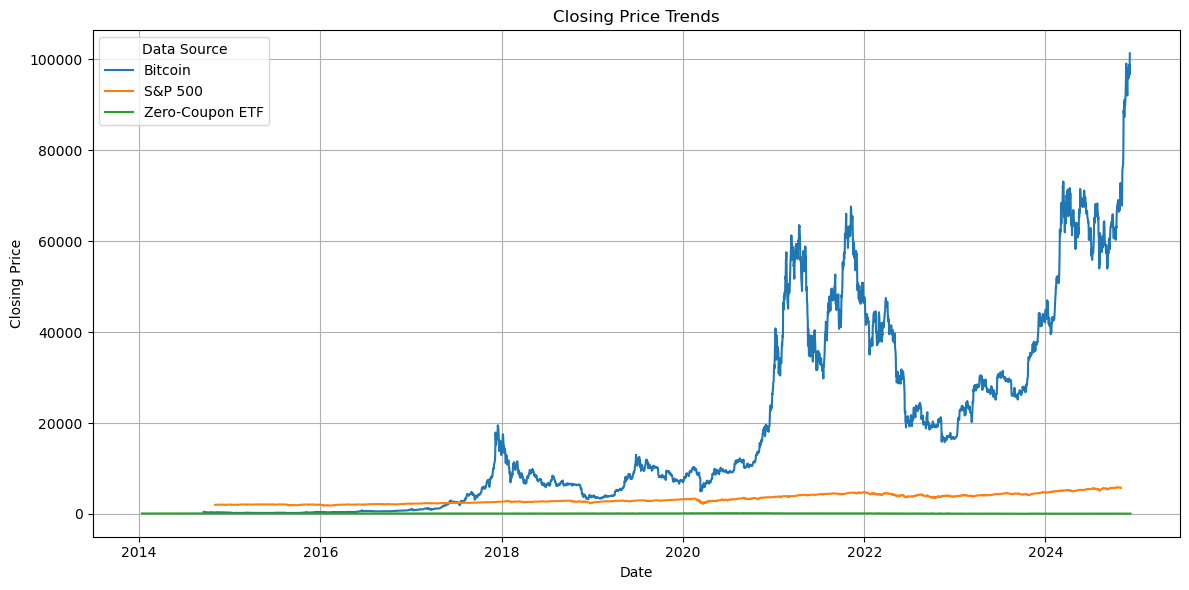

In [42]:
# Rename columns 
df1['Source'] = 'S&P 500'
df2['Source'] = 'Zero-Coupon ETF'
df3['Source'] = 'Bitcoin'

# Combine the three datasets into one for plotting
combined_data = pd.concat([df1[['Date', 'Close', 'Source']], 
                           df2[['Date', 'Close', 'Source']], 
                           df3[['Date', 'Close', 'Source']]])


plt.figure(figsize=(12, 6))
for source, group_data in combined_data.groupby('Source'):
    plt.plot(group_data['Date'], group_data['Close'], label=source)

# Customize the plot
plt.title('Closing Price Trends')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend(title="Data Source")
plt.grid(True)
plt.tight_layout()

plt.show()

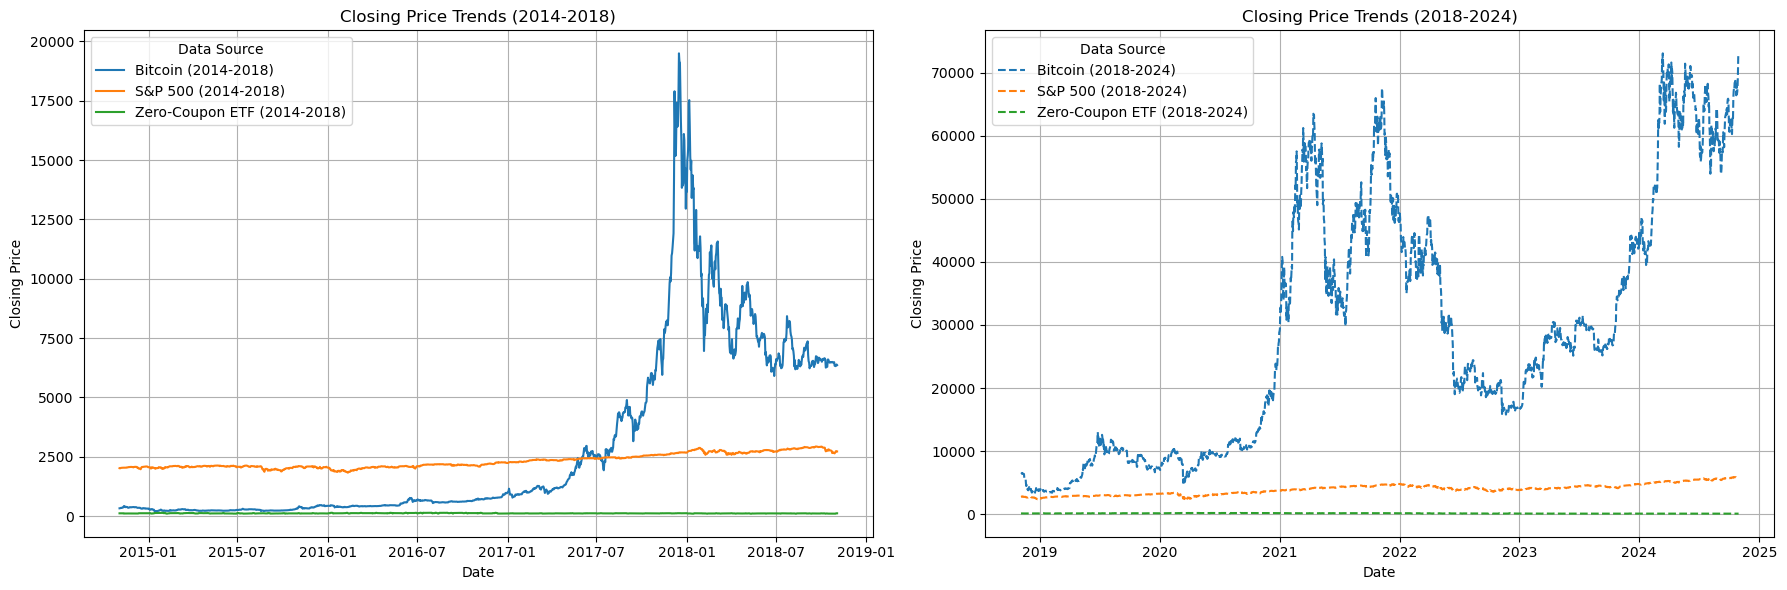

In [43]:
df1['Source'] = 'S&P 500'
df2['Source'] = 'Zero-Coupon ETF'
df3['Source'] = 'Bitcoin'

# Combine the three datasets into one for plotting
combined_data = pd.concat([df1[['Date', 'Close', 'Source']], 
                           df2[['Date', 'Close', 'Source']], 
                           df3[['Date', 'Close', 'Source']]])

# Manually convert any timezone-aware datetime to UTC and remove timezone info
def remove_timezone(date):
    if date is not pd.NaT and date.tzinfo is not None:  # If the date is timezone-aware
        return date.tz_convert('UTC').tz_localize(None)  # Convert to UTC and strip the timezone
    return date  # Return unchanged if it's already naive

combined_data['Date'] = combined_data['Date'].apply(remove_timezone)

start_2014_2018 = pd.to_datetime('2014-11-03')
end_2018_2018 = pd.to_datetime('2018-11-03')

start_2018_2024 = pd.to_datetime('2018-11-04')
end_2024_2024 = pd.to_datetime('2024-10-30')

data_2014_2018 = combined_data[(combined_data['Date'] >= start_2014_2018) & (combined_data['Date'] <= end_2018_2018)]
data_2018_2024 = combined_data[(combined_data['Date'] >= start_2018_2024) & (combined_data['Date'] <= end_2024_2024)]

# Create the figure and axes for two subplots (side by side)
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# Plot data for the first time period (2014-2018) on the first subplot
for source, group_data in data_2014_2018.groupby('Source'):
    axes[0].plot(group_data['Date'], group_data['Close'], label=f"{source} (2014-2018)")

axes[0].set_title('Closing Price Trends (2014-2018)')
axes[0].set_xlabel('Date')
axes[0].set_ylabel('Closing Price')
axes[0].legend(title="Data Source")
axes[0].grid(True)

# Plot data for the second time period (2018-2024) on the second subplot
for source, group_data in data_2018_2024.groupby('Source'):
    axes[1].plot(group_data['Date'], group_data['Close'], label=f"{source} (2018-2024)", linestyle='--')

axes[1].set_title('Closing Price Trends (2018-2024)')
axes[1].set_xlabel('Date')
axes[1].set_ylabel('Closing Price')
axes[1].legend(title="Data Source")
axes[1].grid(True)

# Adjust layout for better spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()


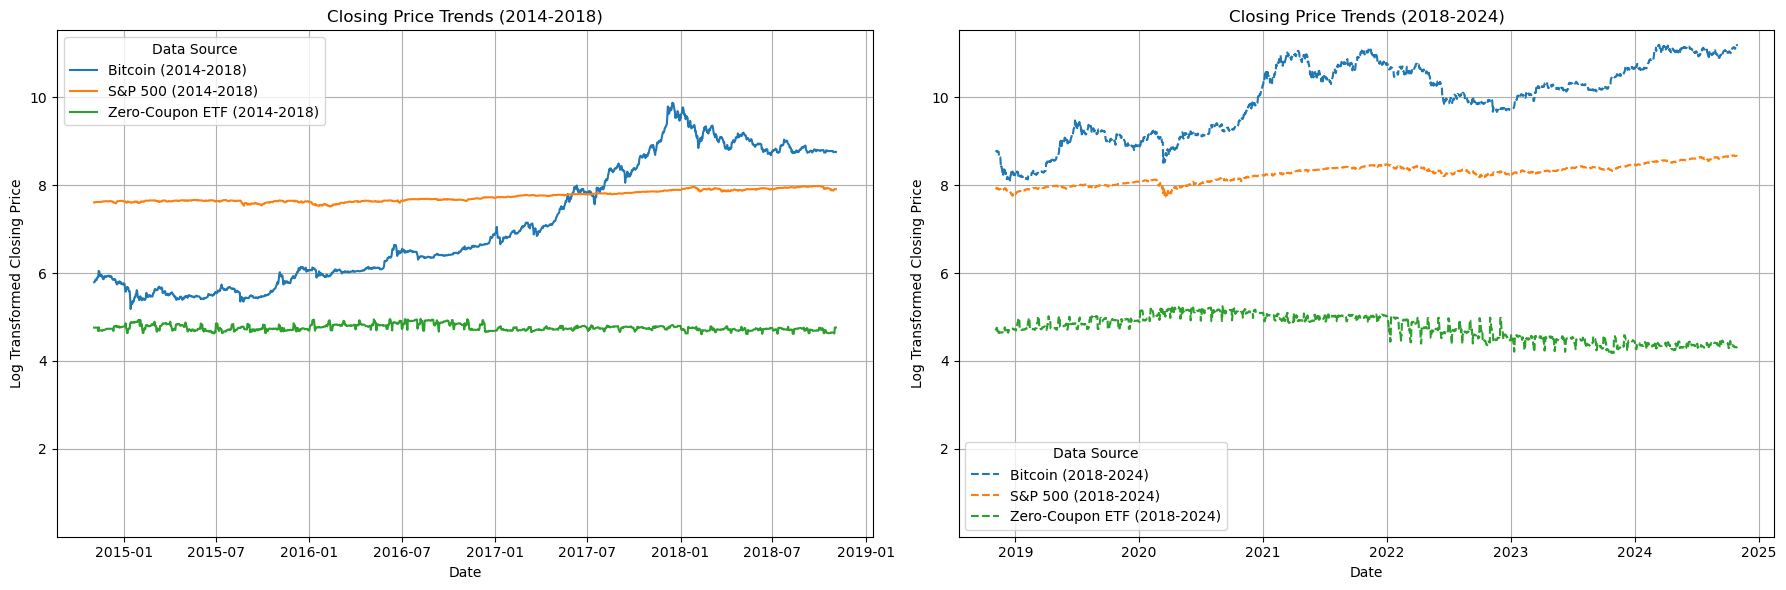

In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import MaxNLocator

# 假设df1, df2, 和df3分别是S&P 500, Zero-Coupon ETF, 和Bitcoin的数据。
# 重命名列以便于理解
df1['Source'] = 'S&P 500'
df2['Source'] = 'Zero-Coupon ETF'
df3['Source'] = 'Bitcoin'

# 对'Close'列进行对数转换，统一量纲
df1['Close'] = np.log(df1['Close'])
df2['Close'] = np.log(df2['Close'])
df3['Close'] = np.log(df3['Close'])

# 将三个数据集合并为一个用于绘图的数据
combined_data = pd.concat([df1[['Date', 'Close', 'Source']], 
                           df2[['Date', 'Close', 'Source']], 
                           df3[['Date', 'Close', 'Source']]])

# 手动转换任何带时区的日期为UTC并去除时区信息
def remove_timezone(date):
    if date is not pd.NaT and date.tzinfo is not None:  # 如果日期有时区信息
        return date.tz_convert('UTC').tz_localize(None)  # 转换为UTC并去除时区
    return date  # 如果已经是无时区日期，直接返回

combined_data['Date'] = combined_data['Date'].apply(remove_timezone)

# 定义两个时间段
start_2014_2018 = pd.to_datetime('2014-11-03')
end_2018_2018 = pd.to_datetime('2018-11-03')

start_2018_2024 = pd.to_datetime('2018-11-04')
end_2024_2024 = pd.to_datetime('2024-10-30')

# 根据时间范围筛选数据
data_2014_2018 = combined_data[(combined_data['Date'] >= start_2014_2018) & (combined_data['Date'] <= end_2018_2018)]
data_2018_2024 = combined_data[(combined_data['Date'] >= start_2018_2024) & (combined_data['Date'] <= end_2024_2024)]

# 创建两个子图（并排显示）
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# 绘制第一个时间段（2014-2018）的数据
for source, group_data in data_2014_2018.groupby('Source'):
    axes[0].plot(group_data['Date'], group_data['Close'], label=f"{source} (2014-2018)")

axes[0].set_title('Closing Price Trends (2014-2018)')
axes[0].set_xlabel('Date')
axes[0].set_ylabel('Log Transformed Closing Price')  # 使用对数变换后的收盘价
axes[0].legend(title="Data Source")
axes[0].grid(True)

# 绘制第二个时间段（2018-2024）的数据
for source, group_data in data_2018_2024.groupby('Source'):
    axes[1].plot(group_data['Date'], group_data['Close'], label=f"{source} (2018-2024)", linestyle='--')

axes[1].set_title('Closing Price Trends (2018-2024)')
axes[1].set_xlabel('Date')
axes[1].set_ylabel('Log Transformed Closing Price')  # 使用对数变换后的收盘价
axes[1].legend(title="Data Source")
axes[1].grid(True)

# 设置y轴的限制和刻度，确保两个子图的Y轴一致
min_y = min(combined_data['Close'].min(), 0)  # Y轴的最小值
max_y = max(combined_data['Close'].max(), 0)  # Y轴的最大值

# 使用MaxNLocator确保Y轴的间隔一致
axes[0].set_ylim(min_y, max_y)
axes[1].set_ylim(min_y, max_y)

axes[0].yaxis.set_major_locator(MaxNLocator(integer=True, prune='lower'))
axes[1].yaxis.set_major_locator(MaxNLocator(integer=True, prune='lower'))

# 调整布局以确保子图之间有足够的空间
plt.tight_layout()

# 显示图表
plt.show()


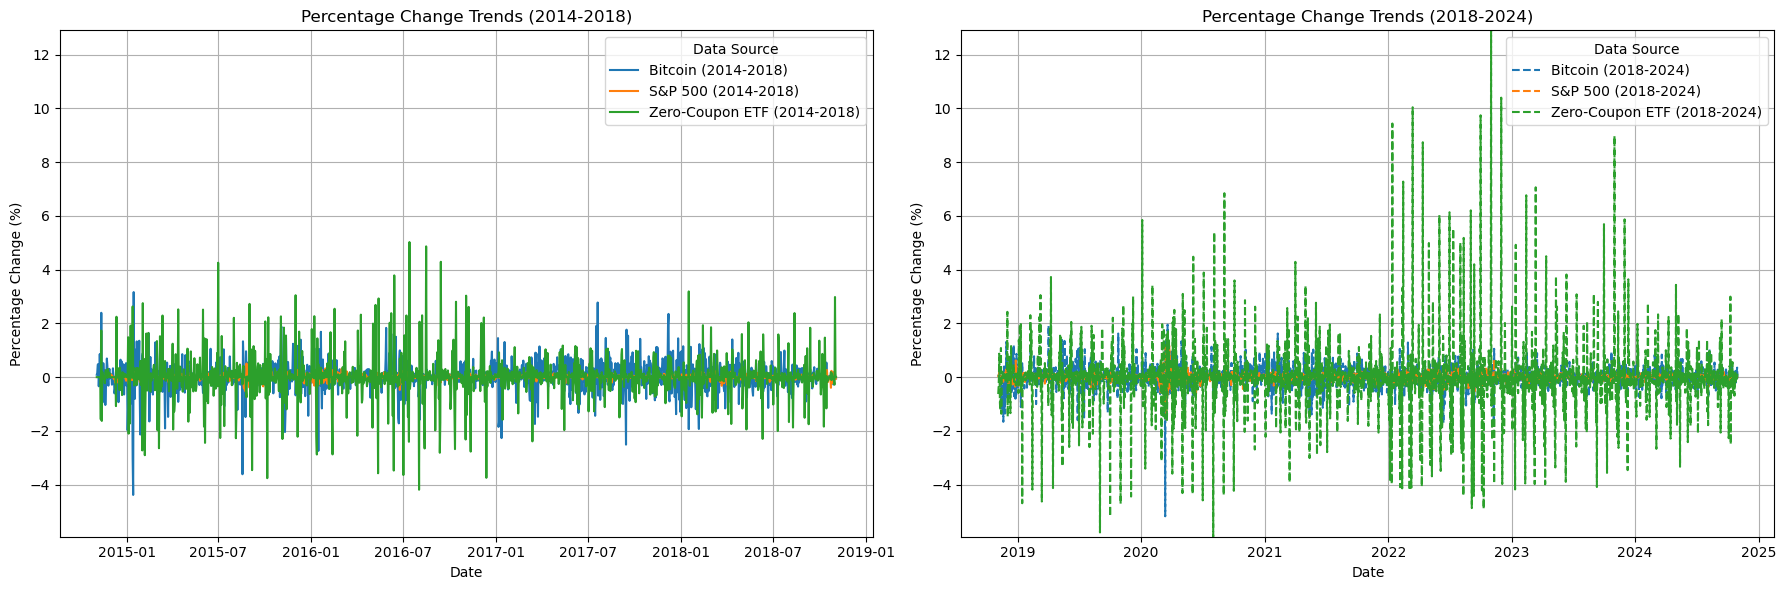

In [45]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import MaxNLocator

# 假设df1, df2, 和df3分别是S&P 500, Zero-Coupon ETF, 和Bitcoin的数据。
# 重命名列以便于理解
df1['Source'] = 'S&P 500'
df2['Source'] = 'Zero-Coupon ETF'
df3['Source'] = 'Bitcoin'

# 计算每个数据点的百分比变化
def calculate_percentage_change(df):
    df['Close'] = df['Close'].pct_change() * 100  # 计算百分比变化
    df = df.dropna()  # 删除缺失值
    return df

# 计算每个数据集的百分比变化
df1 = calculate_percentage_change(df1)
df2 = calculate_percentage_change(df2)
df3 = calculate_percentage_change(df3)

# 将三个数据集合并为一个用于绘图的数据
combined_data = pd.concat([df1[['Date', 'Close', 'Source']], 
                           df2[['Date', 'Close', 'Source']], 
                           df3[['Date', 'Close', 'Source']]])

# 手动转换任何带时区的日期为UTC并去除时区信息
def remove_timezone(date):
    if date is not pd.NaT and date.tzinfo is not None:  # 如果日期有时区信息
        return date.tz_convert('UTC').tz_localize(None)  # 转换为UTC并去除时区
    return date  # 如果已经是无时区日期，直接返回

combined_data['Date'] = combined_data['Date'].apply(remove_timezone)

# 定义两个时间段
start_2014_2018 = pd.to_datetime('2014-11-03')
end_2018_2018 = pd.to_datetime('2018-11-03')

start_2018_2024 = pd.to_datetime('2018-11-04')
end_2024_2024 = pd.to_datetime('2024-10-30')

# 根据时间范围筛选数据
data_2014_2018 = combined_data[(combined_data['Date'] >= start_2014_2018) & (combined_data['Date'] <= end_2018_2018)]
data_2018_2024 = combined_data[(combined_data['Date'] >= start_2018_2024) & (combined_data['Date'] <= end_2024_2024)]

# 创建两个子图（并排显示）
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# 绘制第一个时间段（2014-2018）的数据
for source, group_data in data_2014_2018.groupby('Source'):
    axes[0].plot(group_data['Date'], group_data['Close'], label=f"{source} (2014-2018)")

axes[0].set_title('Percentage Change Trends (2014-2018)')
axes[0].set_xlabel('Date')
axes[0].set_ylabel('Percentage Change (%)')  # 使用百分比变化
axes[0].legend(title="Data Source")
axes[0].grid(True)

# 绘制第二个时间段（2018-2024）的数据
for source, group_data in data_2018_2024.groupby('Source'):
    axes[1].plot(group_data['Date'], group_data['Close'], label=f"{source} (2018-2024)", linestyle='--')

axes[1].set_title('Percentage Change Trends (2018-2024)')
axes[1].set_xlabel('Date')
axes[1].set_ylabel('Percentage Change (%)')  # 使用百分比变化
axes[1].legend(title="Data Source")
axes[1].grid(True)

# 设置y轴的限制和刻度，确保两个子图的Y轴一致
min_y = min(combined_data['Close'].min(), 0)  # Y轴的最小值
max_y = max(combined_data['Close'].max(), 0)  # Y轴的最大值

# 使用MaxNLocator确保Y轴的间隔一致
axes[0].set_ylim(min_y, max_y)
axes[1].set_ylim(min_y, max_y)

axes[0].yaxis.set_major_locator(MaxNLocator(integer=True, prune='lower'))
axes[1].yaxis.set_major_locator(MaxNLocator(integer=True, prune='lower'))

# 调整布局以确保子图之间有足够的空间
plt.tight_layout()

# 显示图表
plt.show()


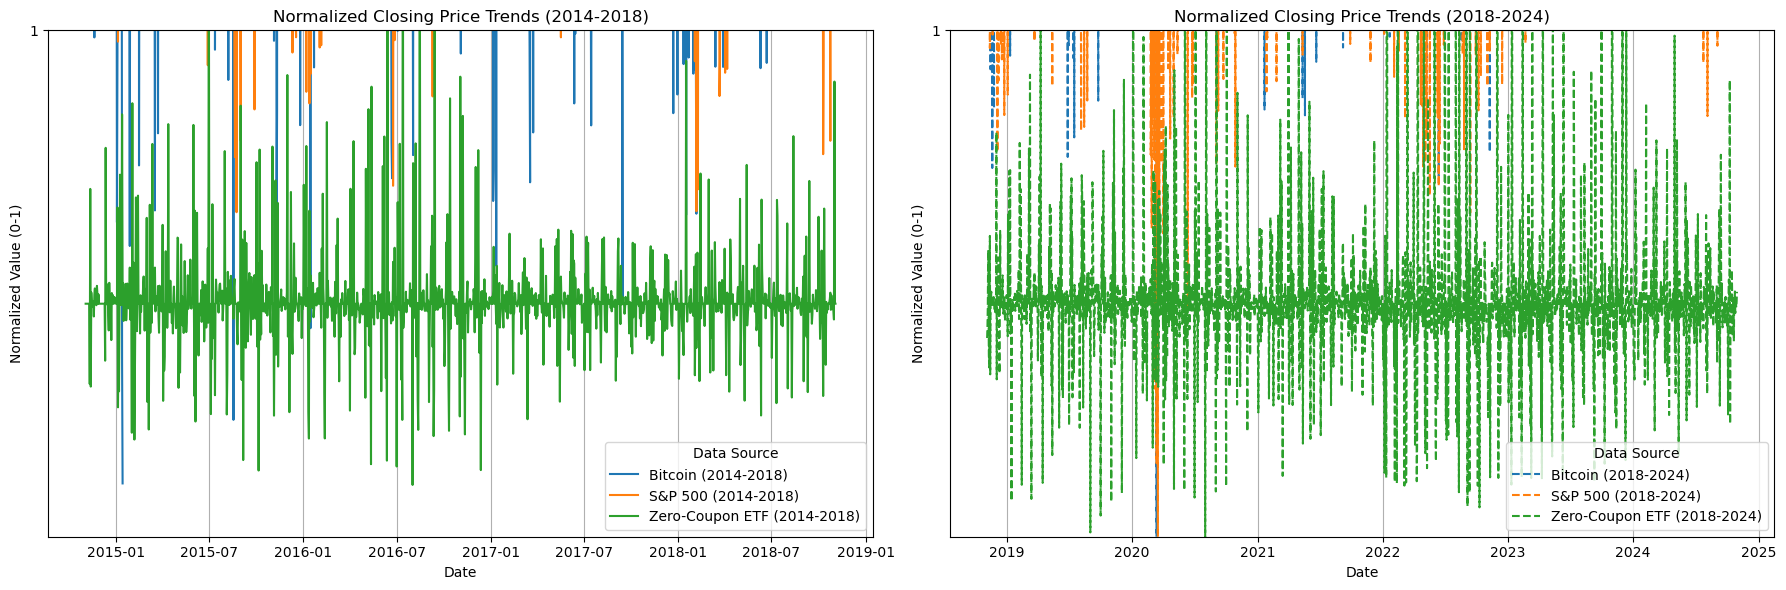

In [46]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import MaxNLocator

# 假设df1, df2, 和df3分别是S&P 500, Zero-Coupon ETF, 和Bitcoin的数据。
# 重命名列以便于理解
df1['Source'] = 'S&P 500'
df2['Source'] = 'Zero-Coupon ETF'
df3['Source'] = 'Bitcoin'

# 归一化到0-1之间
def normalize(df):
    df['Close'] = (df['Close'] - df['Close'].min()) / (df['Close'].max() - df['Close'])
    return df

# 归一化处理
df1 = normalize(df1)
df2 = normalize(df2)
df3 = normalize(df3)

# 将三个数据集合并为一个用于绘图的数据
combined_data = pd.concat([df1[['Date', 'Close', 'Source']], 
                           df2[['Date', 'Close', 'Source']], 
                           df3[['Date', 'Close', 'Source']]])

# 手动转换任何带时区的日期为UTC并去除时区信息
def remove_timezone(date):
    if date is not pd.NaT and date.tzinfo is not None:  # 如果日期有时区信息
        return date.tz_convert('UTC').tz_localize(None)  # 转换为UTC并去除时区
    return date  # 如果已经是无时区日期，直接返回

combined_data['Date'] = combined_data['Date'].apply(remove_timezone)

# 定义两个时间段
start_2014_2018 = pd.to_datetime('2014-11-03')
end_2018_2018 = pd.to_datetime('2018-11-03')

start_2018_2024 = pd.to_datetime('2018-11-04')
end_2024_2024 = pd.to_datetime('2024-10-30')

# 根据时间范围筛选数据
data_2014_2018 = combined_data[(combined_data['Date'] >= start_2014_2018) & (combined_data['Date'] <= end_2018_2018)]
data_2018_2024 = combined_data[(combined_data['Date'] >= start_2018_2024) & (combined_data['Date'] <= end_2024_2024)]

# 创建两个子图（并排显示）
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# 绘制第一个时间段（2014-2018）的数据
for source, group_data in data_2014_2018.groupby('Source'):
    axes[0].plot(group_data['Date'], group_data['Close'], label=f"{source} (2014-2018)")

axes[0].set_title('Normalized Closing Price Trends (2014-2018)')
axes[0].set_xlabel('Date')
axes[0].set_ylabel('Normalized Value (0-1)')  # 使用0-1归一化后的值
axes[0].legend(title="Data Source")
axes[0].grid(True)

# 绘制第二个时间段（2018-2024）的数据
for source, group_data in data_2018_2024.groupby('Source'):
    axes[1].plot(group_data['Date'], group_data['Close'], label=f"{source} (2018-2024)", linestyle='--')

axes[1].set_title('Normalized Closing Price Trends (2018-2024)')
axes[1].set_xlabel('Date')
axes[1].set_ylabel('Normalized Value (0-1)')  # 使用0-1归一化后的值
axes[1].legend(title="Data Source")
axes[1].grid(True)

# 设置y轴的限制和刻度，确保两个子图的Y轴一致
min_y = 0  # 最小值为0
max_y = 1  # 最大值为1

# 使用MaxNLocator确保Y轴的间隔一致
axes[0].set_ylim(min_y, max_y)
axes[1].set_ylim(min_y, max_y)

axes[0].yaxis.set_major_locator(MaxNLocator(integer=True, prune='lower'))
axes[1].yaxis.set_major_locator(MaxNLocator(integer=True, prune='lower'))

# 调整布局以确保子图之间有足够的空间
plt.tight_layout()

# 显示图表
plt.show()
